In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Subscribers

In [2]:
subscribers = pd.read_pickle('data/subscribers')

subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [116]:
subscribers_columns = ['subid', 'retarget_TF', 'monthly_price', 'discount_price',
                      'creation_until_cancel_days', 'cancel_before_trial_end', 'revenue_net', 'join_fee', 'paid_TF', 'refund_after_trial_TF']

In [8]:
#nas

subscribers.isna().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

In [5]:
subscribers.shape

(227628, 29)

In [6]:
# internet package - independent from ott
subscribers.package_type.value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

count    117178.000000
mean          2.998568
std           0.748752
min           0.049049
25%           2.493926
50%           2.760506
75%           3.271574
max          14.335378
Name: num_weekly_services_utilized, dtype: float64


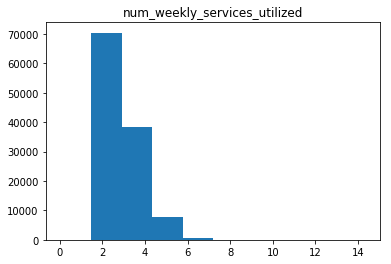

In [13]:
# ott services utilized
print(subscribers['num_weekly_services_utilized'].describe())

plt.hist(subscribers['num_weekly_services_utilized'])
plt.title('num_weekly_services_utilized')
plt.show()

In [16]:
# preferred genre
subscribers.preferred_genre.value_counts()

comedy           125129
drama             46872
regional           8990
international      6404
other              3907
Name: preferred_genre, dtype: int64

In [17]:
# intended use
subscribers.intended_use.value_counts()

access to exclusive content    89039
replace OTT                    69185
supplement OTT                 26603
expand regional access         14025
expand international access    12978
other                           7112
education                       5137
Name: intended_use, dtype: int64

count    189698.000000
mean         27.997724
std           4.976341
min         -32.146760
25%          24.401536
50%          27.301448
75%          30.201361
max          76.599962
Name: weekly_consumption_hour, dtype: float64


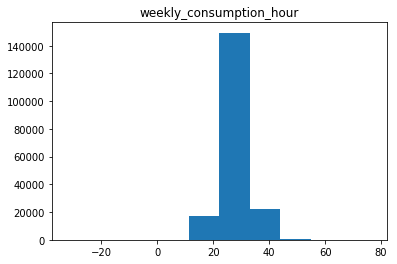

In [18]:
# weekly_consumption_hour
print(subscribers['weekly_consumption_hour'].describe())

plt.hist(subscribers['weekly_consumption_hour'])
plt.title('weekly_consumption_hour')
plt.show()

count    115458.000000
mean          1.999848
std           0.249508
min          -0.919933
25%           1.867354
50%           1.908159
75%           1.953559
max           6.955714
Name: num_ideal_streaming_services, dtype: float64


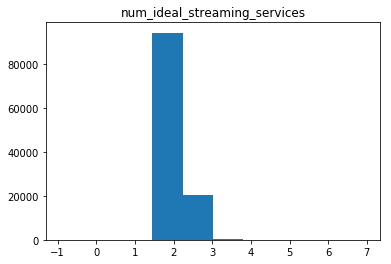

In [19]:
# num_ideal_streaming_services
print(subscribers['num_ideal_streaming_services'].describe())

plt.hist(subscribers['num_ideal_streaming_services'])
plt.title('num_ideal_streaming_services')
plt.show()

In [20]:
subscribers['retarget_TF'].value_counts()

False    219825
True       7803
Name: retarget_TF, dtype: int64

count    1.924590e+05
mean     7.579755e+02
std      1.920204e+05
min      0.000000e+00
25%      3.500000e+01
50%      4.600000e+01
75%      5.700000e+01
max      8.172000e+07
Name: age, dtype: float64


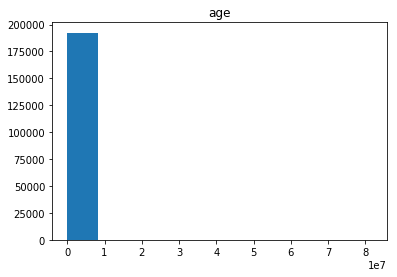

In [21]:
# age
print(subscribers['age'].describe())

plt.hist(subscribers['age'])
plt.title('age')
plt.show()

# not sure about this

In [34]:
subscribers['male_TF'].value_counts()

False    200902
True      26457
Name: male_TF, dtype: int64

In [35]:
subscribers['country'].value_counts()

UAE    227628
Name: country, dtype: int64

In [36]:
subscribers['attribution_technical'].value_counts()
# this is probably last interaction

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
criteo                        44
appstore                      44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [37]:
subscribers['attribution_survey'].value_counts()
# tv comes up here because you can't track tv

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

In [38]:
subscribers['op_sys'].value_counts()

iOS        143921
Android     70332
Name: op_sys, dtype: int64

In [39]:
subscribers['months_per_bill_period'].value_counts()

4    227628
Name: months_per_bill_period, dtype: int64

In [40]:
subscribers['plan_type'].value_counts()

# i think can ignore the country. split into no/14, base/high/low

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
high_jpy_14_day_trial                     1
low_sar_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
Name: plan_type, dtype: int64

In [41]:
subscribers['monthly_price'].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [46]:
subscribers.groupby(['monthly_price', 'plan_type']).subid.agg('count')

monthly_price  plan_type                        
0.8074         low_sar_no_trial                          1
1.0643         low_uae_no_trial                        167
1.1744         low_eur_no_trial                          1
4.0003         high_aud_14_day_trial                     2
4.3673         high_sar_14_day_trial                    12
4.4407         base_eur_14_day_trial                    18
4.6976         high_jpy_14_day_trial                     1
4.7343         base_uae_14_day_trial                227096
               base_uae_no_trial_7_day_guarantee         1
               low_gbp_14_day_trial                      4
5.1013         high_uae_14_day_trial                   325
Name: subid, dtype: int64

In [43]:
subscribers['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [45]:
subscribers.groupby(['discount_price', 'monthly_price', 'plan_type']).subid.agg('count')
#5-10% difference

discount_price  monthly_price  plan_type                        
0.7707          0.8074         low_sar_no_trial                          1
1.0276          1.0643         low_uae_no_trial                        167
1.1744          1.1744         low_eur_no_trial                          1
3.7801          4.0003         high_aud_14_day_trial                     2
4.0737          4.3673         high_sar_14_day_trial                    12
4.2205          4.4407         base_eur_14_day_trial                    18
4.3673          4.7343         low_gbp_14_day_trial                      4
4.4407          4.6976         high_jpy_14_day_trial                     1
                4.7343         base_uae_no_trial_7_day_guarantee         1
4.5141          4.7343         base_uae_14_day_trial                227096
5.0279          5.1013         high_uae_14_day_trial                   325
Name: subid, dtype: int64

count                  227628
unique                 226023
top       2019-11-17 16:24:52
freq                        3
first     2019-06-30 00:00:19
last      2020-03-27 23:59:06
Name: account_creation_date, dtype: object


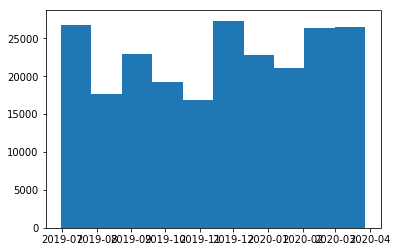

In [49]:
print(subscribers['account_creation_date'].describe())
plt.hist(subscribers['account_creation_date'])
plt.show()

count    151768.000000
mean         16.570832
std          35.777986
min        -108.000000
25%           2.000000
50%           8.000000
75%          13.000000
max         312.000000
Name: creation_until_cancel_days, dtype: float64


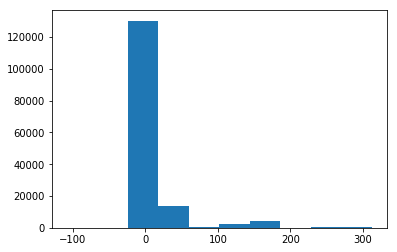

In [50]:
print(subscribers['creation_until_cancel_days'].describe())
plt.hist(subscribers['creation_until_cancel_days'])
plt.show()

In [51]:
subscribers['cancel_before_trial_end'].value_counts()

False    124071
True     103557
Name: cancel_before_trial_end, dtype: int64

count                  227628
unique                    272
top       2019-07-16 00:00:00
freq                     2866
first     2019-07-15 00:00:00
last      2020-04-11 00:00:00
Name: trial_end_date, dtype: object


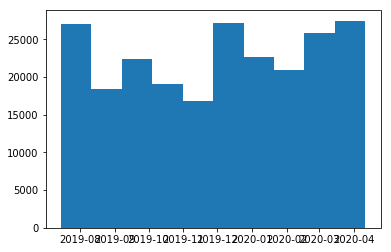

In [52]:
print(subscribers['trial_end_date'].describe())
plt.hist(subscribers['trial_end_date'])
plt.show()

In [54]:
# trial length
(subscribers['trial_end_date'] - subscribers['account_creation_date']).dt.days.value_counts()

 14    227456
-1        145
 0         24
 15         3
dtype: int64

In [55]:
subscribers['initial_credit_card_declined'].value_counts()

False    216425
True      11203
Name: initial_credit_card_declined, dtype: int64

count    192724.000000
mean          1.557353
std           3.068829
min          -5.982100
25%           0.000000
50%           0.000000
75%           2.532300
max          15.634200
Name: revenue_net, dtype: float64


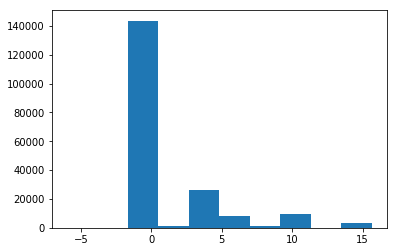

In [56]:
print(subscribers['revenue_net'].describe())
plt.hist(subscribers['revenue_net'])
plt.show()

In [57]:
subscribers['join_fee'].value_counts()

 0.0367    109482
 0.0000     33482
 0.3303     25314
 0.6606     12282
 0.1101     10648
 0.3670      1333
 0.1835       146
-0.0367         9
 0.6973         8
 0.6239         6
-0.6606         2
 0.0734         2
 0.2936         2
 0.1468         2
 0.2569         1
 0.5872         1
 0.4037         1
 0.7340         1
-0.3303         1
-0.1101         1
Name: join_fee, dtype: int64

In [58]:
subscribers['language'].value_counts()

ar    227628
Name: language, dtype: int64

In [59]:
subscribers['paid_TF'].value_counts()

False    135578
True      92050
Name: paid_TF, dtype: int64

In [60]:
subscribers['refund_after_trial_TF'].value_counts()

False    218383
True       9245
Name: refund_after_trial_TF, dtype: int64

In [61]:
subscribers['payment_type'].value_counts()

Standard Charter    38810
Paypal              30911
RAKBANK             14831
CBD                  5080
Najim                2414
Apple Pay               4
Name: payment_type, dtype: int64

## Engagement

In [6]:
engagement = pd.read_pickle('data/engagement')

engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [72]:
engagement.shape

(2585724, 9)

In [77]:
# number of users:
len(engagement.subid.drop_duplicates())

135019

/Users/Sandra/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


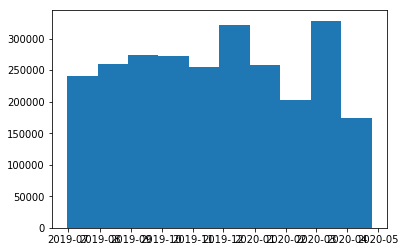

In [556]:
plt.hist(engagement.date)
plt.show()

In [112]:
engagement[engagement['app_opens'].isna()]

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
130421,23932003,2019-09-16,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130425,23932003,2019-09-17,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130429,23932003,2019-09-18,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130433,23932003,2019-09-20,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130437,23932003,2019-09-21,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130441,23932003,2019-09-27,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130445,23932003,2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130449,23932003,2019-09-29,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130453,23932003,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130457,23932003,2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [115]:
engagement['date'].max()

Timestamp('2020-04-25 00:00:00')

## Cust Service Reps

In [4]:
customer_service_reps = pd.read_pickle('data/customer_service_reps')

customer_service_reps.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [116]:
customer_service_reps.shape

(2208643, 13)

In [123]:
len(customer_service_reps.subid.drop_duplicates())

1369360

In [668]:
customer_service_reps['customer_type'] = np.where(customer_service_reps['subid'].isin(subscribers['subid']), 'OTT + subscriber',
                                                 np.where(customer_service_reps['billing_channel'] == 'OTT', 'OTT only',
                                                         customer_service_reps['billing_channel']))

customer_service_reps[['subid', 'customer_type']].drop_duplicates().customer_type.value_counts()

OTT only            1074822
itunes               142253
OTT + subscriber     135050
google                17235
Name: customer_type, dtype: int64

In [43]:
sub_billing = customer_service_reps[['subid', 'billing_channel']].drop_duplicates()

sub_billing.billing_channel.value_counts()

OTT       1209872
itunes     142253
google      17235
Name: billing_channel, dtype: int64

In [693]:
subs_eachtable = customer_service_reps[['subid', 'billing_channel', 'current_sub_TF']].drop_duplicates().merge(subscribers[['subid', 'paid_TF']], on ='subid', how ='outer')
subs_eachtable = subs_eachtable.merge(engagement.groupby('subid').payment_period.agg('max').reset_index(), on ='subid', how ='outer')

subs_eachtable['engagement'] = np.where(subs_eachtable['payment_period'].isna(), 0, 1)
subs_eachtable['subscribers'] = np.where(subs_eachtable['paid_TF'].isna(), 0, 1)
subs_eachtable['cust_service'] = np.where(subs_eachtable['billing_channel'].isna(), 0, 1)

subs_eachtable = subs_eachtable.fillna('Null')

subs_eachtable['sub_type'] = np.where(subs_eachtable['billing_channel'].isin(['google', 'itunes']), 'App only',
                                     np.where(subs_eachtable['billing_channel'] == "Null", 'Subscriber,\nno cust service',
                                             np.where(subs_eachtable['subscribers'] == 0, 'OTT only',
                                                     'OTT and\nsubscriber')))

subs_eachtable.head()

,subid,billing_channel,current_sub_TF,paid_TF,payment_period,engagement,subscribers,cust_service,sub_type
0,25108574,itunes,False,Null,Null,0,0,1,App only
1,25914865,itunes,True,Null,Null,0,0,1,App only
2,28778936,google,True,Null,Null,0,0,1,App only
3,21481314,google,True,Null,Null,0,0,1,App only
4,24230000,google,True,Null,Null,0,0,1,App only


In [817]:
subs_typecount = subs_eachtable.pivot_table(index ='sub_type', columns = 'current_sub_TF', values ='subid', aggfunc ='count', fill_value = 0)

subs_typecount.columns = ['Churned', 'Active', 'Unknown']
#subs_typecount['Total'] = subs_typecount.sum(axis = 1)

subs_typecount

,Churned,Active,Unknown
sub_type,,,
App only,131143,28345,0
OTT and\nsubscriber,102695,32355,0
OTT only,806211,268611,0
"Subscriber,\nno cust service",0,0,92578


In [818]:
print("Total customers: %d" % subs_typecount.sum().sum())

Total customers: 1461938


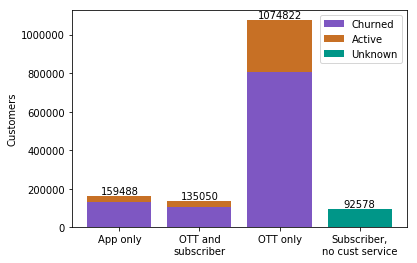

In [725]:
plt.bar(subs_typecount.index, subs_typecount['Churned'], label = "Churned", color = '#7e57c2')
plt.bar(subs_typecount.index, subs_typecount['Active'], bottom = subs_typecount['Churned'], 
        label = "Active", color = '#c77025')
plt.bar(subs_typecount.index, subs_typecount['Unknown'], label = "Unknown", color = '#009688')

for i in range(0, len(subs_typecount)):
    plt.text(x= subs_typecount.index[i], y = subs_typecount['Total'][i], s = subs_typecount['Total'][i],
            verticalalignment='bottom', horizontalalignment='center')

plt.legend()
plt.ylabel('Customers')
plt.show()

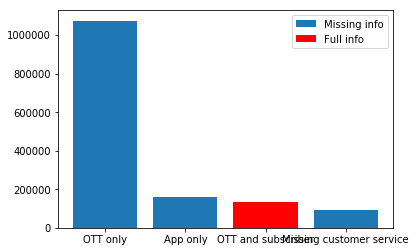

In [670]:
subs_typecount = subs_eachtable['sub_type'].value_counts().reset_index()
subs_typecount['type2'] = np.where(subs_typecount['index'] == 'OTT and subscriber', subs_typecount['sub_type'], 0)
subs_typecount


plt.bar(subs_typecount['index'], subs_typecount['sub_type'], label = 'Missing info')
plt.bar(subs_typecount['index'], subs_typecount['type2'], color ='red', label = 'Full info')
plt.legend()
plt.show()

In [669]:
subs_typecount

,index,sub_type,type2
0,OTT only,1074822,0
1,App only,159488,0
2,OTT and subscriber,135050,135050
3,Missing customer service,92578,0


In [131]:
ids_analyze = subs_eachtable[subs_eachtable['sub_type'] == 'OTT and subscriber'].subid.values

print("Total ids to analyze: %d" % len(ids_analyze))

Total ids to analyze: 135050


In [135]:
sub_summary = customer_service_reps[customer_service_reps.subid.isin(ids_analyze)].groupby(['subid', 'current_sub_TF', 'trial_completed_TF']).payment_period.agg('max').reset_index()

sub_summary.groupby(['current_sub_TF', 'trial_completed_TF']).subid.agg('count')

current_sub_TF  trial_completed_TF
False           False                 72666
                True                  30029
True            True                  32355
Name: subid, dtype: int64

In [136]:
customer_service_reps[['subid','current_sub_TF', 'trial_completed_TF']].drop_duplicates().groupby(['current_sub_TF', 'trial_completed_TF']).agg('count')

subid
current_sub_TF trial_completed_TF        
False          False               660927
               True                379122
True           True                329311

In [175]:
# remove with next last billing is the same
customer_service_reps = customer_service_reps[~(customer_service_reps['last_payment'] == customer_service_reps['next_payment'])]

In [176]:
monthly_cust = customer_service_reps[customer_service_reps['payment_period'] != 0].pivot_table(index = 'month', columns ='renew2', values = 'subid', aggfunc='count').reset_index()

monthly_cust

# exclude march onwards because not every customer would've renewed by then

renew2,month,False,True
0,2019-06,48,110
1,2019-07,53413,35225
2,2019-08,23907,21087
3,2019-09,31835,27068
4,2019-10,36320,28492
5,2019-11,52627,36366
6,2019-12,62499,37088
7,2020-01,66718,28010
8,2020-02,56589,25506
9,2020-03,142639,17766


In [177]:
acquisition_month = customer_service_reps[customer_service_reps['payment_period'] == 1].groupby('month').subid.agg('count').reset_index()

acquisition_month

,month,subid
0,2019-06,158
1,2019-07,88495
2,2019-08,39835
3,2019-09,46773
4,2019-10,51999
5,2019-11,58760
6,2019-12,73986
7,2020-01,52497
8,2020-02,45652
9,2020-03,105340


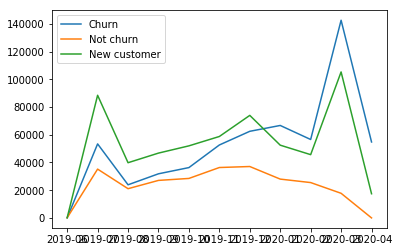

In [178]:
plt.plot(monthly_cust['month'], monthly_cust[False], label = "Churn")
plt.plot(monthly_cust['month'], monthly_cust[True], label = "Not churn")
plt.plot(acquisition_month['month'], acquisition_month['subid'], label = "New customer")
plt.legend()
plt.show()

In [184]:
customer_service_reps[customer_service_reps['cancel_date'].isna() & (customer_service_reps['renew2'] == False)]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,renew2,month
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN,False,2020-01
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN,False,2020-04
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN,False,2020-03
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN,False,2020-03
15,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,1,2020-03-28 04:59:17,NaT,NaN,False,2020-03
17,37537571,22111363,True,NaT,2020-03-27 22:38:36,0,True,google,1.1377,1,2020-03-28 04:38:39,NaT,NaN,False,2020-03
19,31649550,26606371,True,NaT,2020-03-27 22:06:38,0,True,google,1.1377,1,2020-03-28 04:06:42,NaT,NaN,False,2020-03
21,32585559,25421493,True,NaT,2020-03-27 20:53:17,0,True,google,1.1377,1,2020-03-28 03:53:23,NaT,NaN,False,2020-03
23,39294567,24120196,True,NaT,2020-03-27 23:14:23,0,True,google,1.1377,1,2020-03-28 03:14:28,NaT,NaN,False,2020-03
25,37336404,29409169,True,NaT,2020-03-27 21:08:55,0,True,google,1.1377,1,2020-03-28 03:09:03,NaT,NaN,False,2020-03


In [186]:
len(customer_service_reps['customer_service_rep_id'].drop_duplicates())

1031

In [188]:
customer_service_reps[['subid', 'current_sub_TF']].drop_duplicates().current_sub_TF.value_counts()

False    1040049
True      329311
Name: current_sub_TF, dtype: int64

In [192]:
customer_service_reps[customer_service_reps['current_sub_TF'] == True]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,renew2,month
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN,True,2020-03
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN,False,2020-04
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN,True,2020-03
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN,False,2020-03
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN,True,2020-03
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN,False,2020-03
14,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,0,2020-03-27 22:59:09,2020-03-28 04:59:17,NaN,True,2020-03
15,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,1,2020-03-28 04:59:17,NaT,NaN,False,2020-03
16,37537571,22111363,True,NaT,2020-03-27 22:38:36,0,True,google,1.1377,0,2020-03-27 22:38:36,2020-03-28 04:38:39,NaN,True,2020-03
17,37537571,22111363,True,NaT,2020-03-27 22:38:36,0,True,google,1.1377,1,2020-03-28 04:38:39,NaT,NaN,False,2020-03


In [199]:
customer_service_reps[['subid', 'current_sub_TF','renew']].drop_duplicates().fillna('Null').groupby(['current_sub_TF', 'renew']).agg('count')

subid
current_sub_TF renew        
False          False  301737
               True    74846
               Null   738503
True           False   85926
               True    97168
               Null   243999

In [229]:
# check how the periods align between tables
# account creation date is same between cust service and subscribers

df = customer_service_reps.drop(['customer_service_rep_id', 'billing_channel', 'revenue_net_1month', 'renew2', 'cancel_flg'], axis = 1).merge(subscribers[['subid',   
       'creation_until_cancel_days', 'cancel_before_trial_end', 'trial_end_date','paid_TF', 'refund_after_trial_TF']], on = ['subid'])

df = df.merge(engagement.groupby(['subid','payment_period']).date.agg(['min','max']).reset_index(), on = ['subid', 'payment_period'], how = 'left')

df.head(20)

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,month,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max
0,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,0,2020-03-28 00:05:20,NaT,False,2020-03,12.0,False,2020-04-11,False,False,2020-03-27,2020-04-08
1,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,0,2020-03-27 23:58:49,NaT,False,2020-03,5.0,False,2020-04-11,False,False,2020-03-27,2020-04-01
2,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,0,2020-03-28 00:05:20,NaT,False,2020-03,12.0,False,2020-04-11,False,False,2020-03-27,2020-04-08
3,23796492,True,NaT,2020-03-27 23:52:29,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,2020-03,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10
4,23796492,True,NaT,2020-03-27 23:52:29,14,True,1,2020-04-11 14:22:46,NaT,False,2020-04,NaN,True,2020-04-11,True,False,2020-04-11,2020-04-25
5,20162910,True,NaT,2020-03-27 23:51:37,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,2020-03,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10
6,20162910,True,NaT,2020-03-27 23:51:37,14,True,1,2020-04-11 14:22:46,NaT,False,2020-04,NaN,True,2020-04-11,True,False,2020-04-11,2020-04-23
7,25529197,False,2020-04-09 13:51:56,2020-03-27 23:51:20,14,False,0,2020-03-28 00:05:19,NaT,False,2020-03,13.0,False,2020-04-11,False,False,2020-03-27,2020-04-09
8,23220317,False,2020-04-10 16:28:43,2020-03-27 23:48:52,14,False,0,2020-03-28 07:10:03,NaT,False,2020-03,14.0,False,2020-04-11,False,False,2020-03-27,2020-04-10
9,22120282,True,NaT,2020-03-27 23:47:11,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,2020-03,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10


In [335]:
#checking creation until cancel days
# creation until cancel days - cancelled things at 2020-04-28 (perhaps cust service is a day old)

df_individual = customer_service_reps[['subid', 'current_sub_TF', 'cancel_date', 'account_creation_date', 'num_trial_days', 'trial_completed_TF']].drop_duplicates()
df_individual['cancel_minus_account'] = (df_individual['cancel_date']-df_individual['account_creation_date']).dt.days + 1

df_individual = df_individual.merge(subscribers[['subid', 'creation_until_cancel_days']], on = 'subid')
#df_individual = df_individual.fillna('Null')
#df_individual.head()

print("Active days different: %d" % sum(df_individual['cancel_minus_account'] != df_individual['creation_until_cancel_days']))

Active days different: 95525


In [261]:
df['subid'].drop_duplicates().count()

135050

In [280]:
# cancel_before_trial_end and trial_completed_TF are the same, and both are wrong
df_trialend = df.groupby(['subid', 'trial_completed_TF', 'cancel_before_trial_end']).payment_period.agg('max').reset_index()

df_trialend['pasttrial'] = np.where(df_trialend['payment_period'] > 0, True, False)

print(df_trialend.head())

print("Incorrect trial: %d" % sum(df_trialend['pasttrial'] == df_trialend['cancel_before_trial_end']))
print("Total subs: %d" % len(df_trialend))

      subid  trial_completed_TF  cancel_before_trial_end  payment_period  \
0  20000062               False                    False               0   
1  20000405               False                    False               0   
2  20000604                True                     True               1   
3  20000685                True                     True               1   
4  20000741               False                    False               0   

   pasttrial  
0      False  
1      False  
2       True  
3       True  
4      False  
Incorrect trial: 130144
Total subs: 135050


In [296]:
#check engagement min max vs customer
df_indeng = df_individual.merge(engagement.groupby('subid').date.agg(['min', 'max']).reset_index(), on = 'subid', how ='left')
df_indeng['engagement_days'] = (df_indeng['max']-df_indeng['min']).dt.days

df_indeng.head(10)

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,cancel_minus_account,creation_until_cancel_days,min,max,engagement_days
0,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,12,12,2020-03-27,2020-04-08,12.0
1,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,5,5,2020-03-27,2020-04-01,5.0
2,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,12,12,2020-03-27,2020-04-08,12.0
3,23796492,True,Null,2020-03-27 23:52:29,14,True,Null,Null,2020-03-27,2020-04-25,29.0
4,20162910,True,Null,2020-03-27 23:51:37,14,True,Null,Null,2020-03-27,2020-04-23,27.0
5,25529197,False,2020-04-09 13:51:56,2020-03-27 23:51:20,14,False,13,13,2020-03-27,2020-04-09,13.0
6,23220317,False,2020-04-10 16:28:43,2020-03-27 23:48:52,14,False,14,14,2020-03-27,2020-04-10,14.0
7,22120282,True,Null,2020-03-27 23:47:11,14,True,Null,Null,2020-03-27,2020-04-18,22.0
8,28394515,False,2020-04-04 13:46:14,2020-03-27 23:47:02,14,False,8,8,2020-03-27,2020-04-04,8.0
9,22652005,True,Null,2020-03-27 23:43:28,14,True,Null,Null,2020-03-27,2020-04-25,29.0


In [309]:
df[df['renew'] == False].payment_period.value_counts()

0    77544
1    39788
2    10353
3     1616
Name: payment_period, dtype: int64

In [314]:
df['length_paymentperiod'] = (df['next_payment'] - df['last_payment']).dt.days

df.groupby('payment_period').length_paymentperiod.describe()

,count,mean,std,min,25%,50%,75%,max
payment_period,,,,,,,,
0,57478.0,14.765110,6.573840,0.0,14.0,14.0,14.0,137.0
1,15075.0,121.128226,5.185693,103.0,120.0,121.0,122.0,242.0
2,2290.0,122.648908,1.740445,106.0,122.0,123.0,123.0,139.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/Sandra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Sandra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


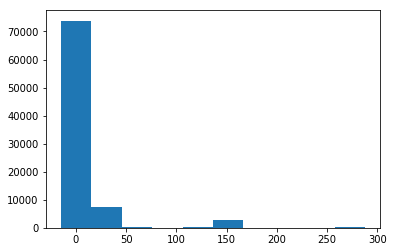

In [336]:
plt.hist(df_individual['cancel_minus_account'])
plt.show()

In [364]:
engagement['month'] = engagement['date'].dt.to_period('M').astype('str')

engagement_month = engagement[['subid','month', 'payment_period']].drop_duplicates()

engagement_month.head()

,subid,month,payment_period
1,22349235,2019-07,0.0
50,20848497,2019-07,0.0
51,22680106,2019-07,0.0
81,22478137,2019-07,0.0
91,21899628,2019-07,0.0


In [378]:
#getting the month they churned
df['churn_month'] = df['cancel_date'].astype('str').str[0:7]

churn_month = df[['subid', 'churn_month']].drop_duplicates()

churn_month['churn_flg'] = 1

churn_month = churn_month[~(churn_month['churn_month'] == 'NaT')]

churn_month.head()

,subid,churn_month,churn_flg
0,21697364,2020-04,1
1,20407871,2020-04,1
2,27818002,2020-04,1
7,25529197,2020-04,1
8,23220317,2020-04,1


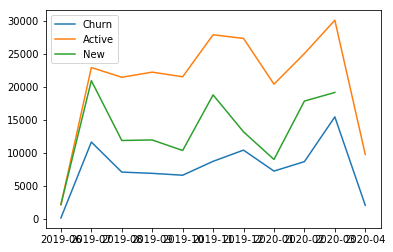

In [402]:
df_individual['churn_month'] = df_individual['cancel_date'].astype('str').str[0:7]
df_individual['activation_month'] = df_individual['account_creation_date'].dt.to_period('M').astype('str')

sum_churn = df_individual.groupby('churn_month').subid.agg('count').reset_index()
sum_churn = sum_churn[~(sum_churn['churn_month'] == "NaT")]

sum_new = df_individual.groupby('activation_month').subid.agg('count').reset_index()

sum_active = engagement_month[['subid', 'month']].drop_duplicates().groupby('month').agg('count').reset_index()

plt.plot(sum_churn['churn_month'],sum_churn['subid'], label = 'Churn')
plt.plot(sum_active['month'],sum_active['subid'], label= 'Active')
plt.plot(sum_new['activation_month'],sum_new['subid'], label= 'New')
plt.legend()
plt.show()

In [405]:
df.head(10)

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max,cancel_minus_account,length_paymentperiod,churn_month
0,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,0,2020-03-28 00:05:20,NaT,False,...,12.0,False,2020-04-11,False,False,2020-03-27,2020-04-08,12.0,NaN,2020-04
1,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,0,2020-03-27 23:58:49,NaT,False,...,5.0,False,2020-04-11,False,False,2020-03-27,2020-04-01,5.0,NaN,2020-04
2,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,0,2020-03-28 00:05:20,NaT,False,...,12.0,False,2020-04-11,False,False,2020-03-27,2020-04-08,12.0,NaN,2020-04
3,23796492,True,NaT,2020-03-27 23:52:29,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,...,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10,NaN,14.0,NaT
4,23796492,True,NaT,2020-03-27 23:52:29,14,True,1,2020-04-11 14:22:46,NaT,False,...,NaN,True,2020-04-11,True,False,2020-04-11,2020-04-25,NaN,NaN,NaT
5,20162910,True,NaT,2020-03-27 23:51:37,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,...,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10,NaN,14.0,NaT
6,20162910,True,NaT,2020-03-27 23:51:37,14,True,1,2020-04-11 14:22:46,NaT,False,...,NaN,True,2020-04-11,True,False,2020-04-11,2020-04-23,NaN,NaN,NaT
7,25529197,False,2020-04-09 13:51:56,2020-03-27 23:51:20,14,False,0,2020-03-28 00:05:19,NaT,False,...,13.0,False,2020-04-11,False,False,2020-03-27,2020-04-09,13.0,NaN,2020-04
8,23220317,False,2020-04-10 16:28:43,2020-03-27 23:48:52,14,False,0,2020-03-28 07:10:03,NaT,False,...,14.0,False,2020-04-11,False,False,2020-03-27,2020-04-10,14.0,NaN,2020-04
9,22120282,True,NaT,2020-03-27 23:47:11,14,True,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,...,NaN,True,2020-04-11,True,False,2020-03-27,2020-04-10,NaN,14.0,NaT


In [411]:
# when do people churn
df_individual[df_individual['trial_completed_TF'] == True]['creation_until_cancel_days'].describe()

count    13112.000000
mean        70.258618
std         70.090230
min         14.000000
25%         18.000000
50%         31.000000
75%        139.000000
max        312.000000
Name: creation_until_cancel_days, dtype: float64

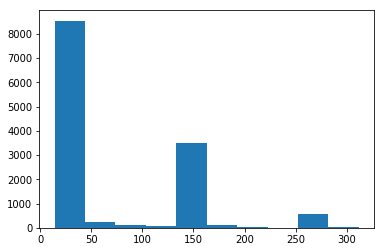

In [414]:
plt.hist(df_individual[df_individual['trial_completed_TF'] == True]['creation_until_cancel_days'])
plt.show()

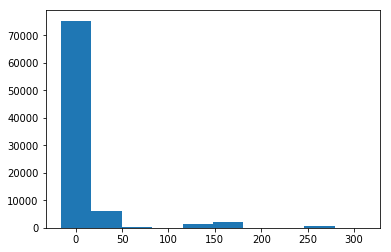

In [415]:
plt.hist(df_individual['creation_until_cancel_days'])
plt.show()

In [410]:
df[df['subid'] == 20125588]

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max,cancel_minus_account,length_paymentperiod,churn_month
21,20125588,False,2020-04-11 14:14:08,2020-03-27 23:32:13,14,True,0,2020-03-28 07:10:03,NaT,False,...,15.0,True,2020-04-11,False,False,2020-03-27,2020-04-10,15.0,NaN,2020-04


In [418]:
# very few people didn't get a trial
df_individual['num_trial_days'].value_counts()

14    135016
0         34
Name: num_trial_days, dtype: int64

In [427]:
df['renew'] = np.where((df['renew'].isna() & ~df['next_payment'].isna()), True, df['renew'])

In [438]:
df_renew = df.pivot_table(index = 'subid', columns='payment_period', values = 'renew', aggfunc='sum')

df_renew.head(20)

payment_period,0,1,2,3
subid,,,,
20000062,False,NaN,NaN,NaN
20000405,False,NaN,NaN,NaN
20000604,True,False,NaN,NaN
20000685,True,False,NaN,NaN
20000741,False,NaN,NaN,NaN
20000796,True,False,NaN,NaN
20000809,True,True,True,False
20000863,False,NaN,NaN,NaN
20000963,False,NaN,NaN,NaN


In [440]:
df_renew.sum()

payment_period
0    57478.0
1    15075.0
2     2290.0
3        0.0
dtype: float64

In [446]:
sum_periods = df_renew.count().reset_index()

sum_periods['pct'] = sum_periods[0] / sum_periods.iloc[0,1]

print(sum_periods)

,payment_period,0,pct
0,0,135050,1.000000
1,1,57478,0.425605
2,2,15075,0.111625
3,3,2290,0.016957


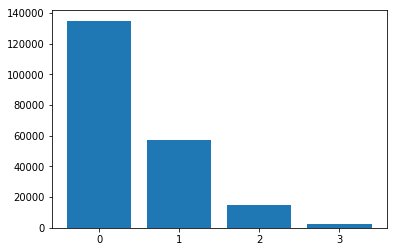

In [449]:
plt.bar(sum_periods['payment_period'].astype('str'), sum_periods[0])
plt.show()

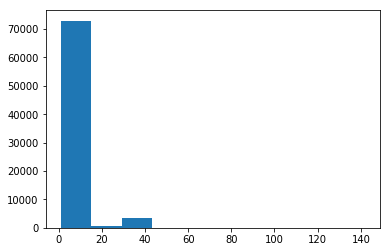

In [483]:
# people who churn in trial
plt.hist(df[(df['payment_period'] == 0) & (df['renew'] == False)]['creation_until_cancel_days'])
plt.show()

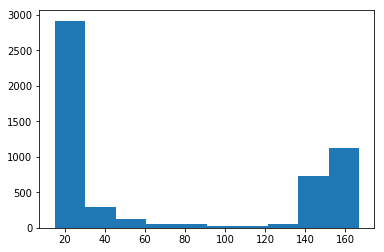

In [455]:
# people who churn in first month
plt.hist(df[(df['payment_period'] == 1) & (df['renew'] == False)]['creation_until_cancel_days'])
plt.show()

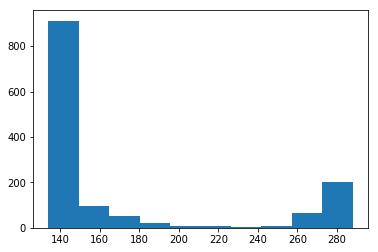

In [460]:
# people who churn in second period
plt.hist(df[(df['payment_period'] == 2) & (df['renew'] == False)]['creation_until_cancel_days'])
plt.show()

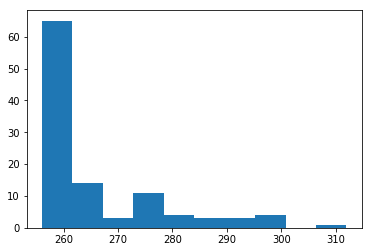

In [461]:
# people who churn in second period
plt.hist(df[(df['payment_period'] == 3) & (df['renew'] == False)]['creation_until_cancel_days'])
plt.show()

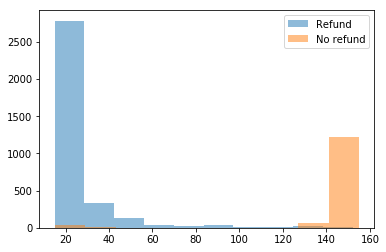

In [475]:
# people who churn in first month
plt.hist(df[(df['payment_period'] == 1) & (df['renew'] == False) & (df['refund_after_trial_TF'] == True)]['cancel_minus_account'], alpha = 0.5, label = 'Refund')
plt.hist(df[(df['payment_period'] == 1) & (df['renew'] == False) & (df['refund_after_trial_TF'] == False)]['cancel_minus_account'], alpha = 0.5, label = 'No refund')
plt.legend()
plt.show()

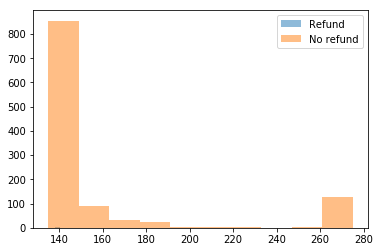

In [474]:
# people who churn in 2nd period
plt.hist(df[(df['payment_period'] == 2) & (df['renew'] == False) & (df['refund_after_trial_TF'] == True)]['cancel_minus_account'], alpha = 0.5, label = 'Refund')
plt.hist(df[(df['payment_period'] == 2) & (df['renew'] == False) & (df['refund_after_trial_TF'] == False)]['cancel_minus_account'], alpha = 0.5, label = 'No refund')
plt.legend()
plt.show()

In [485]:
df[(df['payment_period'] == 0) & (df['renew'] == False) & (df['cancel_minus_account'] > 30)]

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max,cancel_minus_account,length_paymentperiod,churn_month
2385,23305342,False,2020-04-21 09:40:22,2020-03-22 02:48:44,14,True,0,2020-03-22 06:38:19,NaT,False,...,30.0,True,2020-04-06,False,False,2020-03-22,2020-04-05,31.0,NaN,2020-04
2453,20405597,False,2020-04-21 10:21:36,2020-03-22 01:14:54,14,True,0,2020-03-22 06:38:19,NaT,False,...,30.0,True,2020-04-06,False,False,2020-03-22,2020-04-02,31.0,NaN,2020-04
2475,27849353,False,2020-04-21 09:46:22,2020-03-22 00:39:36,14,True,0,2020-03-22 06:38:19,NaT,False,...,30.0,True,2020-04-06,False,False,2020-03-22,2020-04-04,31.0,NaN,2020-04
2594,28387977,False,2020-04-21 10:24:31,2020-03-21 21:32:12,14,True,0,2020-03-21 23:03:58,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-03-22,31.0,NaN,2020-04
2602,22487921,False,2020-04-21 10:24:29,2020-03-21 21:19:20,14,True,0,2020-03-21 21:19:20,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-04-04,31.0,NaN,2020-04
2610,28306563,False,2020-04-21 10:25:18,2020-03-21 21:10:44,14,True,0,2020-03-21 21:10:44,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-03-24,31.0,NaN,2020-04
2651,23547622,False,2020-04-21 10:06:22,2020-03-21 20:07:50,14,True,0,2020-03-21 23:03:58,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-03-31,31.0,NaN,2020-04
2758,26940878,False,2020-04-21 09:41:33,2020-03-21 17:33:59,14,True,0,2020-03-21 19:55:20,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-03-21,31.0,NaN,2020-04
2926,28869584,False,2020-04-21 09:36:28,2020-03-21 13:23:16,14,True,0,2020-03-21 15:52:23,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-04-04,31.0,NaN,2020-04
2944,21738566,False,2020-04-21 09:39:08,2020-03-21 12:37:06,14,True,0,2020-03-21 14:15:52,NaT,False,...,31.0,True,2020-04-05,False,False,2020-03-21,2020-04-04,31.0,NaN,2020-04


In [481]:
df[df['subid'] == 22291501]

,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max,cancel_minus_account,length_paymentperiod,churn_month
80020,22291501,False,2020-04-20 10:04:17,2019-12-05 17:23:15,14,True,0,2019-12-05 19:34:16,2019-12-20 13:35:01,True,...,137.0,True,2019-12-20,True,False,2019-12-05,2019-12-19,137.0,14.0,2020-04
80021,22291501,False,2020-04-20 10:04:17,2019-12-05 17:23:15,14,True,1,2019-12-20 13:35:01,2020-04-20 14:26:36,True,...,137.0,True,2019-12-20,True,False,2019-12-20,2020-01-19,137.0,122.0,2020-04
80022,22291501,False,2020-04-20 10:04:17,2019-12-05 17:23:15,14,True,2,2020-04-20 14:26:36,NaT,False,...,137.0,True,2019-12-20,True,False,2020-01-20,2020-02-09,137.0,NaN,2020-04


In [489]:
subscribers['initial_credit_card_declined'].value_counts()

False    216425
True      11203
Name: initial_credit_card_declined, dtype: int64

In [548]:
sum_status = df.groupby(['subid', 'current_sub_TF', 'refund_after_trial_TF']).payment_period.agg('max').reset_index()
sum_status['last_period'] = np.where(sum_status['refund_after_trial_TF'] == True, 0, sum_status['payment_period'])

sum_status = sum_status.pivot_table(index='last_period', columns = 'current_sub_TF', values = 'subid', aggfunc ='count')
sum_status['prev_cumsum'] = (sum_status[True] + sum_status[False]).shift(1, fill_value = 0).cumsum()

sum_status.head()


current_sub_TF,False,True,prev_cumsum
last_period,,,
0,81704,174,0
1,17259,20881,81878
2,3591,9155,120018
3,141,2145,132764


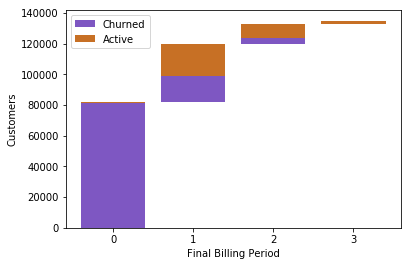

In [731]:
plt.bar(sum_status.index.astype(str), sum_status[False], bottom = sum_status['prev_cumsum'], 
        label = "Churned", color = '#7e57c2')
plt.bar(sum_status.index.astype(str), sum_status[True], bottom = sum_status['prev_cumsum'] + sum_status[False], 
        label = "Active", color = '#c77025')
plt.legend()
plt.ylabel('Customers')
plt.xlabel('Final Billing Period')
plt.show()

In [529]:
print("People with refund: %d" % sum_status['refund_after_trial_TF'].sum())

People with refund: 4235


Even if their refund is later, they are inactive on the platform.

In [524]:
df[df['subid'] == 29262453].iloc[:,3:]

,account_creation_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew,month,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,paid_TF,refund_after_trial_TF,min,max,cancel_minus_account,length_paymentperiod,churn_month
150826,2019-09-01 06:44:02,14,True,0,2019-09-01 08:43:11,2019-09-16 13:48:34,True,2019-09,163.0,True,2019-09-16,True,True,2019-09-01,2019-09-03,164.0,15.0,2020-02
150827,2019-09-01 06:44:02,14,True,1,2019-09-16 13:48:34,2020-01-16 13:43:23,True,2019-09,163.0,True,2019-09-16,True,True,NaT,NaT,164.0,121.0,2020-02
150828,2019-09-01 06:44:02,14,True,2,2020-01-16 13:43:23,NaT,NaN,2020-01,163.0,True,2019-09-16,True,True,NaT,NaT,164.0,NaN,2020-02


In [512]:
subscribers[subscribers['subid'] == 27152292].iloc[:,10:]

,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
8443,UAE,facebook,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 06:36:52,151.0,True,2019-07-15,False,0.0,0.0367,ar,True,True,Paypal


In [490]:
subscribers[subscribers['initial_credit_card_declined'] == True].creation_until_cancel_days.describe()

count    11141.000000
mean        28.839961
std          6.842126
min          5.000000
25%         30.000000
50%         31.000000
75%         31.000000
max        154.000000
Name: creation_until_cancel_days, dtype: float64

In [495]:
subscribers[subscribers['initial_credit_card_declined'] == True][['subid','creation_until_cancel_days']].merge(customer_service_reps[customer_service_reps['payment_period'] == 1]['subid'], on = 'subid').creation_until_cancel_days.describe()

count     10.000000
mean     136.700000
std       22.251342
min       94.000000
25%      131.250000
50%      146.500000
75%      152.750000
max      154.000000
Name: creation_until_cancel_days, dtype: float64

In [459]:
# there are people who churn in the first few days
df[['subid', 'creation_until_cancel_days', 'refund_after_trial_TF']].drop_duplicates().groupby('refund_after_trial_TF').creation_until_cancel_days.describe()

,count,mean,std,min,25%,50%,75%,max
refund_after_trial_TF,,,,,,,,
False,81543.0,15.88671,36.441091,-16.0,3.0,8.0,12.0,312.0
True,4235.0,25.28170,23.080577,14.0,15.0,17.0,24.0,277.0


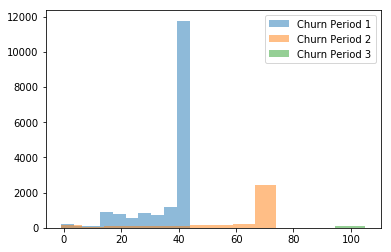

In [811]:
# find what day customer churned - based off days active
# filter out customers who got refund
churn_day = df[(df['refund_after_trial_TF'] == False)]

# get churned customers
churn_day = churn_day[churn_day['current_sub_TF'] == False]

# just get their max period
churn_day = churn_day.groupby(['subid', 'account_creation_date'])['payment_period','max'].agg('max').reset_index()

# get customers who made it through trial
churn_day = churn_day[churn_day['payment_period'] > 0]

churn_day['active_length'] = (churn_day['max']-churn_day['account_creation_date']).dt.days

churn_day.head()

plt.hist(churn_day[churn_day['payment_period'] == 1]['active_length'], alpha = 0.5, label ='Churn Period 1')
plt.hist(churn_day[churn_day['payment_period'] == 2]['active_length'], alpha = 0.5, label ='Churn Period 2')
plt.hist(churn_day[churn_day['payment_period'] == 3]['active_length'], alpha = 0.5, label ='Churn Period 3')
plt.legend()
plt.show()

In [807]:
# churn time using cancellation date
# find what day customer churned
# filter out customers who got refund
churn_day = df[(df['refund_after_trial_TF'] == False)]

# get churned customers
churn_day = churn_day[churn_day['current_sub_TF'] == False]

# just get their max period
churn_day = churn_day.groupby(['subid', 'creation_until_cancel_days'])['payment_period'].agg('max').reset_index()

# get customers who made it through trial
churn_day = churn_day[churn_day['payment_period'] > 0]


churn_day.head()

,subid,creation_until_cancel_days,payment_period
22,20003821,153.0,1
35,20006160,151.0,1
63,20008521,185.0,2
74,20009483,141.0,2
82,20010012,273.0,2


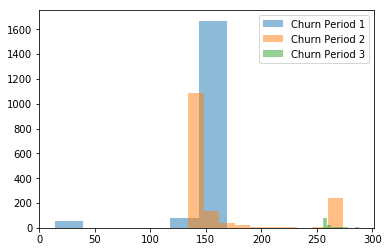

In [810]:
plt.hist(churn_day[churn_day['payment_period'] == 1]['creation_until_cancel_days'], alpha = 0.5, label ='Churn Period 1')
plt.hist(churn_day[churn_day['payment_period'] == 2]['creation_until_cancel_days'], alpha = 0.5, label ='Churn Period 2')
plt.hist(churn_day[churn_day['payment_period'] == 3]['creation_until_cancel_days'], alpha = 0.5, label ='Churn Period 3')
plt.legend()
plt.show()

## Acquisition channel

* Attribution technical aligns more closely with the money that invested (no TV no radio)

In [561]:
subscribers['attribution_technical'].value_counts().head(10)

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
Name: attribution_technical, dtype: int64

In [562]:
subscribers['attribution_survey'].value_counts().head(10)

facebook          119126
tv                 39904
referral           20882
search              8492
pinterest           7856
other               6496
public_radio        6219
social_organic      3869
youtube             3108
podcast             2995
Name: attribution_survey, dtype: int64

In [567]:
spend = pd.read_csv('data/advertisingspend.csv')
spend['date'] = pd.to_datetime(spend['date'], infer_datetime_format=True).dt.to_period('M')
spend.head()

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10,51300,76000,21000,21400,12200,32300,6700,7300


In [598]:
sum_spend = spend.drop('date', axis = 1).sum().sort_values(ascending=False)
sum_spend

email                      760600
facebook                   552700
search                     232500
email_blast                226400
brand sem intent google    216100
affiliate                  139500
referral                    73400
pinterest                   63300
dtype: int64

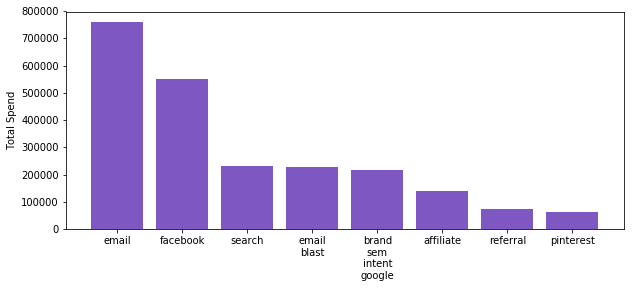

In [732]:
# spend total
plt.figure(figsize = (10,4))
plt.bar(sum_spend.index.str.replace('_', '\n').str.replace(' ', '\n'), sum_spend, color = '#7e57c2')
plt.ylabel('Total Spend')
plt.show()

In [600]:
acq_channel = df[(df['refund_after_trial_TF'] == False) & (df['payment_period'] > 0)].groupby(['subid', 'account_creation_date']).payment_period.agg('max').reset_index()

acq_channel = acq_channel.merge(subscribers[['subid', 'attribution_technical', 'attribution_survey']], on = 'subid')

# aligning attribution channel to spend channels
acq_channel['attribution_technical2'] = np.where(acq_channel['attribution_technical'].isin(spend.columns), acq_channel['attribution_technical'], 
                                                 np.where(acq_channel['attribution_technical'].str.contains("organic"), "organic", 'other'))

acq_channel.head()

,subid,account_creation_date,payment_period,attribution_technical,attribution_survey,attribution_technical2
0,20000604,2020-02-09 13:26:49,1,facebook,facebook,facebook
1,20000685,2020-03-03 05:55:37,1,referral,referral,referral
2,20000796,2019-09-26 02:15:40,1,facebook,referral,facebook
3,20000809,2019-07-13 20:40:21,3,organic,facebook,organic
4,20001112,2019-09-14 03:49:52,1,organic,facebook,organic


In [583]:
len(acq_channel)

53172

In [602]:
# which channels didn't they spend in
acq_channel[~acq_channel['attribution_technical'].isin(spend.columns)].attribution_technical.value_counts()

organic                  5902
google_organic           3099
facebook_organic          637
brand sem intent bing     603
other                     587
discovery                 449
internal                  412
bing                      235
podcast                   210
display                   205
bing_organic              117
youtube                   109
direct_mail                47
vod                        43
samsung                    26
ott                        21
appstore                   20
quora                      14
pinterest_organic           7
criteo                      6
twitter                     2
content_greatist            2
influencer                  2
tv                          1
Name: attribution_technical, dtype: int64

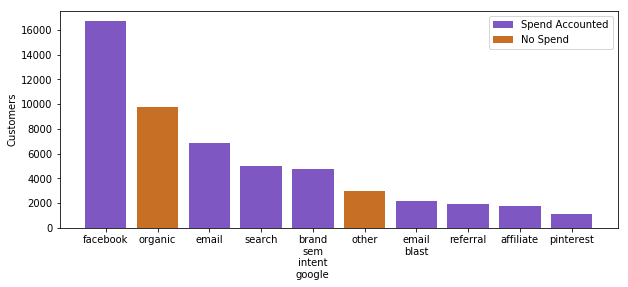

In [738]:
sum_acqchannel = acq_channel.attribution_technical2.value_counts()
sum_acqchannel2 = np.where(sum_acqchannel.index.isin(spend.columns), 0, sum_acqchannel)

plt.figure(figsize = (10,4))
plt.bar(sum_acqchannel.index.str.replace('_', '\n').str.replace(' ', '\n'),sum_acqchannel, 
        color = '#7e57c2', label = 'Spend Accounted')
plt.bar(sum_acqchannel.index.str.replace('_', '\n').str.replace(' ', '\n'),sum_acqchannel2, 
        color = '#c77025', label = 'No Spend')
plt.legend()
plt.ylabel('Customers')
plt.show()

In [589]:
acq_channel.attribution_survey.value_counts().head(10)
# survey ads tv and radio

facebook          26647
tv                 9123
referral           6909
public_radio       2059
pinterest          1623
search             1536
other              1289
social_organic      798
podcast             737
youtube             421
Name: attribution_survey, dtype: int64

In [763]:
acq_channel['month'] = acq_channel['account_creation_date'].dt.to_period('M')

acq_month = acq_channel.groupby('month').subid.agg('count')

In [773]:
acq_channel.pivot_table(index = 'month', columns ='attribution_technical2', values = 'subid', aggfunc ='count')

attribution_technical2,affiliate,brand sem intent google,email,email_blast,facebook,organic,other,pinterest,referral,search
month,,,,,,,,,,
2019-06,36,82,125,55,414,164,39,10,14,28
2019-07,317,680,1302,711,2798,1497,371,175,240,362
2019-08,207,450,730,197,1732,627,202,108,158,383
2019-09,242,427,600,557,1252,843,326,104,227,377
2019-10,65,374,488,273,1422,697,218,91,157,380
2019-11,85,697,826,264,3190,1098,402,150,263,655
2019-12,98,524,640,82,1600,796,247,126,208,639
2020-01,114,409,402,13,722,728,305,106,171,491
2020-02,256,620,750,25,1762,1452,502,166,227,929


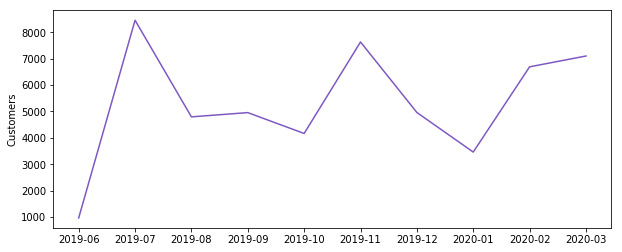

In [776]:
# monthly acquisition
plt.figure(figsize = (10,4))
plt.plot(acq_month.index.astype(str), acq_month, color = '#7e57c2')
plt.ylabel('Customers')
plt.show()

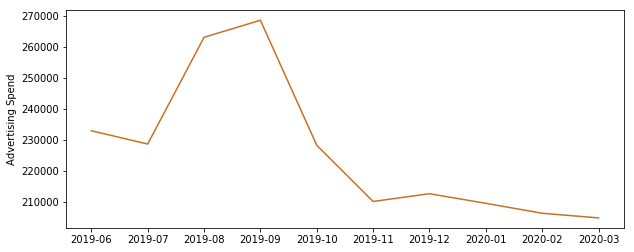

In [778]:
# monthly spend
plt.figure(figsize = (10,4))
plt.plot(acq_month.index.astype(str), spend.iloc[:,1:].sum(axis = 1),
        color = '#c77025')
plt.ylabel('Advertising Spend')
plt.show()

## Product

* For OTT customers, a vast majority had 14 day trial so hard to test anything with trial period.

In [624]:
df_plan = customer_service_reps[['subid', 'num_trial_days', 'payment_period', 'revenue_net_1month']].drop_duplicates()
df_plan = df_plan.merge(subscribers[['subid', 'months_per_bill_period', 'plan_type', 'monthly_price', 'discount_price', 'revenue_net', 'join_fee']], on = 'subid')

df_plan.head()

,subid,num_trial_days,payment_period,revenue_net_1month,months_per_bill_period,plan_type,monthly_price,discount_price,revenue_net,join_fee
0,21697364,14,0,0.0000,4,base_uae_14_day_trial,4.7343,4.5141,0.0000,0.3303
1,20407871,14,0,0.0000,4,base_uae_14_day_trial,4.7343,4.5141,0.0000,0.0000
2,27818002,14,0,0.0000,4,base_uae_14_day_trial,4.7343,4.5141,0.0000,0.3303
3,23796492,14,0,4.5875,4,base_uae_14_day_trial,4.7343,4.5141,4.5875,0.0367
4,23796492,14,1,4.5875,4,base_uae_14_day_trial,4.7343,4.5141,4.5875,0.0367


In [628]:
df_plan[['subid','plan_type','num_trial_days']].drop_duplicates().groupby(['plan_type','num_trial_days']).agg('count')

,,subid
plan_type,num_trial_days,
base_eur_14_day_trial,14,10
base_uae_14_day_trial,14,134750
base_uae_no_trial_7_day_guarantee,0,1
high_aud_14_day_trial,14,2
high_jpy_14_day_trial,14,1
high_sar_14_day_trial,14,10
high_uae_14_day_trial,14,242
low_gbp_14_day_trial,14,1
low_uae_no_trial,0,33


In [649]:
# itunes/google customers have 1 month periods.
# ott have 4 month periods.
customer_service_reps['period_length'] = (customer_service_reps['next_payment']-customer_service_reps['last_payment']).dt.days

Test if month (itunes) or 4 month (OTT) billing is better.

In [667]:
# churned customers
# 14 day trial

customer_service_reps[(customer_service_reps['current_sub_TF'] == False) & (customer_service_reps['num_trial_days'] == 14)].groupby(['subid', 'customer_type']).revenue_net_1month.agg('sum').reset_index().groupby('customer_type').revenue_net_1month.agg(['count', 'mean', 'std']).reset_index()

,customer_type,count,mean,std
0,OTT and subscription,102676,1.978154,4.004862
1,OTT only,801015,1.548391,3.631166
2,itunes,60101,0.736731,1.264268


In [643]:
# number trial days
customer_service_reps[~(customer_service_reps['billing_channel'] == "OTT")].num_trial_days.value_counts()

7     156903
14    137642
0      58269
Name: num_trial_days, dtype: int64

In [749]:
df_apponly = customer_service_reps[(customer_service_reps['billing_channel'] == "itunes")]

df_apponly = df_apponly.groupby(['subid', 'billing_channel' ,'num_trial_days']).payment_period.agg(['min', 'max']).reset_index()

df_apponly = df_apponly[df_apponly['min'] == 0]

df_apponly['passed_trial'] = np.where(df_apponly['max'] > 0, True, False)

df_apponly.head(10)

,subid,billing_channel,num_trial_days,min,max,passed_trial
0,20000043,itunes,14,0,2,True
1,20000189,itunes,14,0,0,False
2,20000216,itunes,7,0,0,False
3,20000227,itunes,14,0,1,True
4,20000511,itunes,14,0,0,False
5,20000564,itunes,14,0,1,True
6,20000585,itunes,7,0,0,False
7,20000605,itunes,14,0,0,False
8,20000628,itunes,14,0,0,False
9,20000647,itunes,14,0,1,True


In [751]:
ab_trial = df_apponly.pivot_table(index ='num_trial_days', columns = 'passed_trial', values ='subid', aggfunc = 'count')

ab_trial['Total'] = ab_trial.sum(axis = 1)

ab_trial

passed_trial,False,True,Total
num_trial_days,,,
7,28729,32225,60954
14,43161,32133,75294


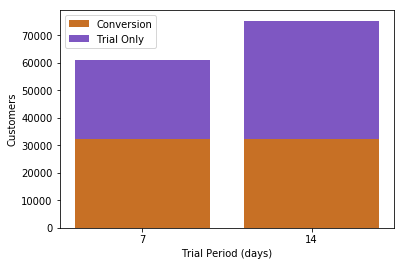

In [755]:
plt.bar(ab_trial.index.astype(str), ab_trial[True], 
        label = "Conversion", color = '#c77025')
plt.bar(ab_trial.index.astype(str), ab_trial[False], bottom = ab_trial[True], 
        label = "Trial Only", color = '#7e57c2')
plt.legend()
plt.ylabel('Customers')
plt.xlabel('Trial Period (days)')
plt.show()

## Summary for Final Presentation

In [831]:
def print_summary(df, date_col):
    print('Total Rows: %d' % len(df))
    print('Unique Customers: %d' % len(df.subid.drop_duplicates()))
    print('Min date: %s' % str(min(df[date_col])))
    print('Max date: %s' % str(max(df[date_col])))

In [832]:
print('Customer Service Reps')
print_summary(customer_service_reps, 'account_creation_date')

Customer Service Reps
Total Rows: 2201474
Unique Customers: 1369360
Min date: 2019-06-30 00:00:04
Max date: 2020-03-28 00:00:00


In [834]:
print('Subscribers')
print_summary(subscribers, 'account_creation_date')

Subscribers
Total Rows: 227628
Unique Customers: 227628
Min date: 2019-06-30 00:00:19
Max date: 2020-03-27 23:59:06


In [836]:
print('Engagement')
print_summary(engagement, 'date')

Engagement
Total Rows: 2585724
Unique Customers: 135019
Min date: 2019-06-30 00:00:00
Max date: 2020-04-25 00:00:00
